In [22]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [23]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("/home/christionbradley/435-group-proj/Merge_Sort/good_cali_files/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 279/279 [00:08<00:00, 31.27it/s]


View Calltree

In [25]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

0.000 MPI_Comm_dup
0.000 MPI_Finalize
0.000 MPI_Finalized
0.000 MPI_Initialized
0.006 main
├─ 0.001 comm
│  └─ 0.001 comm_large
│     ├─ 0.000 MPI_Gather
│     ├─ 0.000 MPI_Gatherv
│     └─ 0.000 MPI_Scatter
├─ 0.005 comp
│  ├─ 0.000 comp_large
│  │  └─ 0.000 comm
│  │     └─ 0.000 comm_small
│  │        ├─ 0.000 MPI_Recv
│  │        └─ 0.000 MPI_Send
│  └─ 0.004 comp_small
├─ 0.000 correctness_check
└─ 0.000 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 0.01 indices: {'profile': 17496302})
█ 0.01 - 0.01
█ 0.00 - 0.01
█ 0.00 - 0.00
█ 0.00 - 0.00
█ 0.00 - 0.00
█ 0.00 - 0.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Group Performance data by `matrix_size` in the Thicket metadata table.

In [26]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()

tk.dataframe.head(10)

profile  \
node                                         num_procs input_size input_type                   
{'name': 'MPI_Comm_dup', 'type': 'function'} 2         65536      1%perturbed     2108376407   
                                                                  random          2121515879   
                                                                  reverse_sorted  4111695917   
                                                                  sorted            17496302   
                                                       262144     1%perturbed     4215274925   
                                                                  random          2519150408   
                                                                  reverse_sorted   503813570   
                                                                  sorted          1698162092   
                                                       1048576    1%perturbed     1181354949   
                                                                  random           974646646   

                                                                                   nid  \
node                                         num_procs input_size input_type             
{'name': 'MPI_Comm_dup', 'type': 'function'} 2         65536      1%perturbed     22.0   
                                                                  random          22.0   
                                                                  reverse_sorted  22.0   
                                                                  sorted          22.0   
                                                       262144     1%perturbed     22.0   
                                                                  random          22.0   
                                                                  reverse_sorted  22.0   
                                                                  sorted          22.0   
                                                       1048576    1%perturbed     22.0   
                                                                  random          22.0   

                                                                                   spot.channel  \
node                                         num_procs input_size input_type                      
{'name': 'MPI_Comm_dup', 'type': 'function'} 2         65536      1%perturbed     regionprofile   
                                                                  random          regionprofile   
                                                                  reverse_sorted  regionprofile   
                                                                  sorted          regionprofile   
                                                       262144     1%perturbed     regionprofile   
                                                                  random          regionprofile   
                                                                  reverse_sorted  regionprofile   
                                                                  sorted          regionprofile   
                                                       1048576    1%perturbed     regionprofile   
                                                                  random          regionprofile   

                                                                                  Min time/rank  \
node                                         num_procs input_size input_type                      
{'name': 'MPI_Comm_dup', 'type': 'function'} 2         65536      1%perturbed          0.000090   
                                                                  random               0.000095   
                                                                  reverse_sorted       0.000093   
                                                                  sorted               0.000088   
                                                       262144     1%

In [42]:
# Define common variables
processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
input_sizes = [2**16, 2**18, 2**24, 2**26, 2**28]

processes_weak = [2, 8, 512, 1024]
input_sizes_weak = [2**16, 2**18, 2**24, 2**26]
list_types = ["random", "sorted", "reverse_sorted", "1%perturbed"]

In [7]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
24949256                 2.11.0               4   
28085591                 2.11.0            1024   
39507753                 2.11.0             128   
41911016                 2.11.0              16   
96136562                 2.11.0              64   
111921197                2.11.0               2   
114062893                2.11.0               2   
115958948                2.11.0             512   
144673651                2.11.0              32   
148198284                2.11.0               2   
178170473                2.11.0               4   
178951968                2.11.0             512   
180426038                2.11.0             512   
187847909                2.11.0             512   
192716908                2.11.0               4   
198310722                2.11.0            1024   
198862718                2.11.0               8   
218973072                2.11.0              32   
224780435                2.11.0               2   
262378537                2.11.0             512   
263378017                2.11.0              32   
272609604                2.11.0               2   
273648257                2.11.0             512   
293047731                2.11.0            1024   
309616531                2.11.0              16   
310134744                2.11.0              64   
329737381                2.11.0              32   
331078961                2.11.0               4   
383164664                2.11.0              64   
412565607                2.11.0               8   
425621823                2.11.0               8   
426539282                2.11.0               4   
427119542                2.11.0             128   
429510710                2.11.0              16   
473306443                2.11.0              64   
499790344                2.11.0               4   
502192863                2.11.0              64   
521363449                2.11.0            1024   
528477358                2.11.0               4   
536292038                2.11.0               2   
546531689                2.11.0             128   
550611387                2.11.0             128   
560021169                2.11.0              16   
564938287                2.11.0            1024   
568404302                2.11.0               4   
604835055                2.11.0             128   
609061858                2.11.0               8   
625049579                2.11.0             256   
640245060                2.11.0              32   
658139399                2.11.0             128   
663635601                2.11.0               2   
677753884                2.11.0              32   
701496209                2.11.0               8   
715556766                2.11.0             256   
717959536                2.11.0               2   
721539156                2.11.0              16   
733329933                2.11.0              16   
743776941                2.11.0            1024   
775291430                2.11.0               8   
805592672                2.11.0             512   
809148321                2.11.0             512   
813797550                2.11.0            1024   
873359714                2.11.0             512   
934903738                2.11.0              16   
942194920                2.11.0             256   
1006294917               2.11.0             512   
1011169101               2.11.0             128   
1011976345               2.11.0               8   
1043216237               2.11.0             128   
1061712536               2.11.0            1024   
1069608936               2.11.0               4   
1092188514               2.11.0              64   
1104525979               2.11.0             128   
1180412402               2.11.0             256   
1185362062               2.11.0             256   
1195162386               2.11.0            1024   
1206815587               2.11.0  

In [6]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [7]:
import json

formatted = json.dumps(tk.metadata.to_dict(),indent=4)
print(formatted)

{
    "cali.caliper.version": {
        "1310797": "2.11.0",
        "2772722": "2.11.0",
        "19961575": "2.11.0",
        "32140977": "2.11.0",
        "38032372": "2.11.0",
        "87856454": "2.11.0",
        "100578506": "2.11.0",
        "119585155": "2.11.0",
        "122104611": "2.11.0",
        "123170841": "2.11.0",
        "138156194": "2.11.0",
        "157581148": "2.11.0",
        "162270738": "2.11.0",
        "168239131": "2.11.0",
        "169351336": "2.11.0",
        "204589971": "2.11.0",
        "208279959": "2.11.0",
        "216782290": "2.11.0",
        "223441129": "2.11.0",
        "230886619": "2.11.0",
        "255456666": "2.11.0",
        "259892754": "2.11.0",
        "262722760": "2.11.0",
        "263765974": "2.11.0",
        "295616419": "2.11.0",
        "316493566": "2.11.0",
        "371826358": "2.11.0",
        "386872170": "2.11.0",
        "387912920": "2.11.0",
        "395411381": "2.11.0",
        "406188758": "2.11.0",
        "407229

In [9]:
print(tk.dataframe)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15,7)
    )
    return plot

In [9]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    ax.set_xticklabels(threads)
    plt.show()
    return fig, ax

In [10]:
tk.dataframe.keys()

Index(['profile', 'nid', 'spot.channel', 'Min time/rank', 'Max time/rank',
       'Avg time/rank', 'Total time', 'Variance time/rank', 'Calls/rank (min)',
       'Calls/rank (avg)', 'Calls/rank (max)', 'Calls/rank (total)',
       'Min time/rank (exc)', 'Max time/rank (exc)', 'Avg time/rank (exc)',
       'Total time (exc)', 'name'],
      dtype='object')

In [20]:
tk.dataframe.columns

Index(['profile', 'nid', 'spot.channel', 'Min time/rank', 'Max time/rank',
       'Avg time/rank', 'Total time', 'Variance time/rank', 'Calls/rank (min)',
       'Calls/rank (avg)', 'Calls/rank (max)', 'Calls/rank (total)',
       'Min time/rank (exc)', 'Max time/rank (exc)', 'Avg time/rank (exc)',
       'Total time (exc)', 'name'],
      dtype='object')

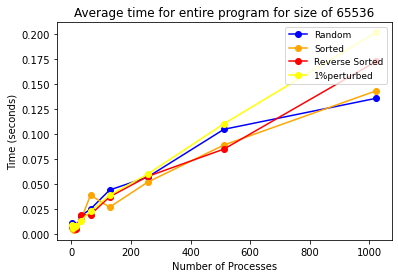

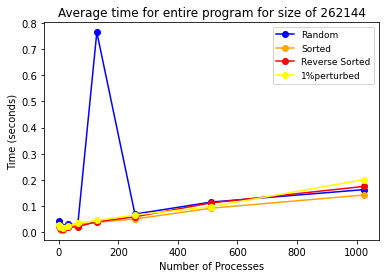

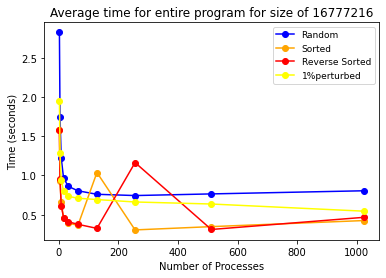

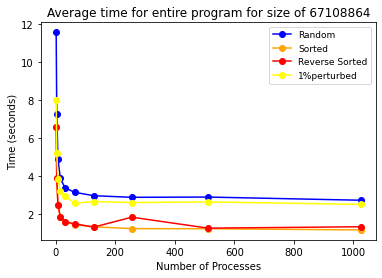

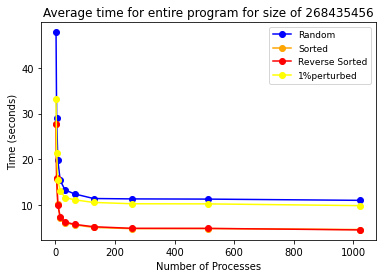

<Figure size 432x288 with 0 Axes>

In [57]:
# Strong Scaling
for node in tk.graph.traverse():
    for m_size in input_sizes:
        if node.frame["name"] in ("main"):
            new_df = tk.dataframe.loc[node]
            x_vals_processes = []
            y_vals_random = []
            y_vals_sorted = []
            y_vals_reverse = []
            y_vals_perturb = []
            data_random = new_df.loc[(slice(None), m_size, "random"), "Avg time/rank"]
            data_sorted = new_df.loc[(slice(None), m_size, "sorted"), "Avg time/rank"]
            data_reverse = new_df.loc[(slice(None), m_size, "reverse_sorted"), "Avg time/rank"]
            data_perturb = new_df.loc[(slice(None), m_size, "1%perturbed"), "Avg time/rank"]
            for process in processes:
                x_vals_processes.append(process)
                try:
                    temp = data_random[(process, m_size)]
                    avg = 0
                    counter = 0
                    for val in temp:
                        avg += val
                        counter += 1
                    avg = avg/counter
                    y_vals_random.append(avg)
                    
                except:
                    pass
                
                try:
                    temp = data_sorted[(process, m_size)]
                    avg = 0
                    counter = 0
                    for val in temp:
                        avg += val
                        counter += 1
                    avg = avg/counter
                    y_vals_sorted.append(avg)
                except:
                    pass
                
                try:
                    temp = data_reverse[(process, m_size)]
                    avg = 0
                    counter = 0
                    for val in temp:
                        avg += val
                        counter += 1
                    avg = avg/counter
                    y_vals_reverse.append(avg)
                except:
                    pass
                
                try:
                    temp = data_perturb[(process, m_size)]
                    avg = 0
                    counter = 0
                    for val in temp:
                        avg += val
                        counter += 1
                    avg = avg/counter
                    y_vals_perturb.append(avg)
                except:
                    pass
                
            plt.plot(x_vals_processes, y_vals_random, marker='o', color='blue', label="Random")
            plt.plot(x_vals_processes, y_vals_sorted, marker='o', color='orange', label="Sorted")
            plt.plot(x_vals_processes, y_vals_reverse, marker='o', color='red', label="Reverse Sorted")
            plt.plot(x_vals_processes, y_vals_perturb, marker='o', color='yellow', label="1%perturbed")
    
#             plt.plot(x_vals_processes, y_vals_min, marker='o', color='orange', label="Min Time/Rank")
#             plt.plot(x_vals_processes, y_vals_max, marker='o', color='red', label="Max Time/Rank")
            plt.xlabel("Number of Processes")
            plt.ylabel('Time (seconds)')
            plt.legend(loc=1, prop={'size': 9})
            plt.title(f'Average time for entire program for size of {m_size}')
            plt.savefig(f'final_results/strongscaling_{m_size}_{node.frame["name"]}.png', bbox_inches = 'tight')
            plt.show()
            plt.clf()
        

In [ ]:
# Strong Scaling
for node in tk.graph.traverse():
    for m_size in input_sizes:
        if node.frame["name"] in ("main"):
            new_df = tk.dataframe.loc[node]
            x_vals_processes = []
            y_vals_random = []
            y_vals_sorted = []
            y_vals_reverse = []
            y_vals_perturb = []
            data_random = new_df.loc[(slice(None), m_size, "random"), "Avg time/rank"]
            data_sorted = new_df.loc[(slice(None), m_size, "sorted"), "Avg time/rank"]
            data_reverse = new_df.loc[(slice(None), m_size, "reverse_sorted"), "Avg time/rank"]
            data_perturb = new_df.loc[(slice(None), m_size, "1%perturbed"), "Avg time/rank"]
            for process in processes:
                x_vals_processes.append(process)
                try:
                    temp = data_random[(process, m_size)]
                    avg = 0
                    counter = 0
                    for val in temp:
                        avg += val
                        counter += 1
                    avg = avg/counter
                    y_vals_random.append(avg)
                    
                except:
                    pass
                
                try:
                    temp = data_sorted[(process, m_size)]
                    avg = 0
                    counter = 0
                    for val in temp:
                        avg += val
                        counter += 1
                    avg = avg/counter
                    y_vals_sorted.append(avg)
                except:
                    pass
                
                try:
                    temp = data_reverse[(process, m_size)]
                    avg = 0
                    counter = 0
                    for val in temp:
                        avg += val
                        counter += 1
                    avg = avg/counter
                    y_vals_reverse.append(avg)
                except:
                    pass
                
                try:
                    temp = data_perturb[(process, m_size)]
                    avg = 0
                    counter = 0
                    for val in temp:
                        avg += val
                        counter += 1
                    avg = avg/counter
                    y_vals_perturb.append(avg)
                except:
                    pass
                
            plt.plot(x_vals_processes, y_vals_random, marker='o', color='blue', label="Random")
            plt.plot(x_vals_processes, y_vals_sorted, marker='o', color='orange', label="Sorted")
            plt.plot(x_vals_processes, y_vals_reverse, marker='o', color='red', label="Reverse Sorted")
            plt.plot(x_vals_processes, y_vals_perturb, marker='o', color='yellow', label="1%perturbed")
    
#             plt.plot(x_vals_processes, y_vals_min, marker='o', color='orange', label="Min Time/Rank")
#             plt.plot(x_vals_processes, y_vals_max, marker='o', color='red', label="Max Time/Rank")
            plt.xlabel("Number of Processes")
            plt.ylabel('Time (seconds)')
            plt.legend(loc=1, prop={'size': 9})
            plt.title(f'Average time for entire program for size of {m_size}')
            plt.savefig(f'final_results/strongscaling_{m_size}_{node.frame["name"]}.png', bbox_inches = 'tight')
            plt.show()
            plt.clf()

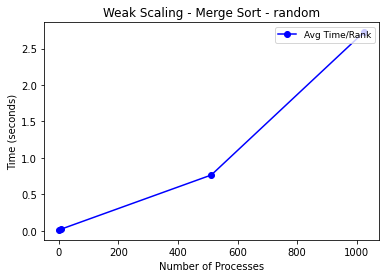

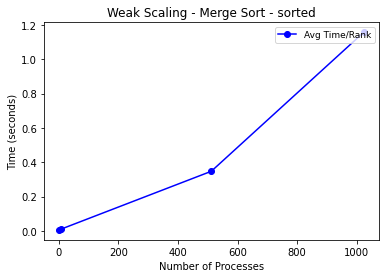

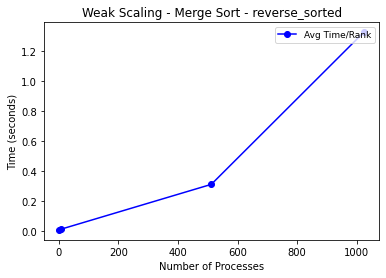

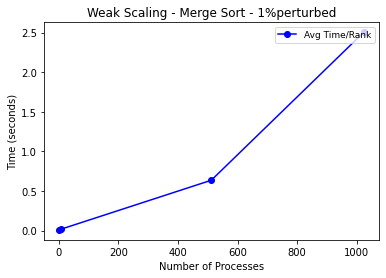

<Figure size 432x288 with 0 Axes>

In [52]:
# Weak Scaling
for node in tk.graph.traverse():
    if node.frame["name"] in ("main"):
        for type_of_list in list_types:
            x_vals_processes = []
            y_vals_avg = []
            y_vals_min = []
            y_vals_max = []
            for m_size, process in zip(input_sizes_weak, processes_weak):

                    new_df = tk.dataframe.loc[node]

                    data = new_df.loc[(slice(None), m_size, type_of_list), "Avg time/rank"]
                    data1 = new_df.loc[(slice(None), m_size, type_of_list), "Min time/rank"]
                    data2 = new_df.loc[(slice(None), m_size, type_of_list), "Max time/rank"]
                    try:
                        temp = data[(process, m_size)]
                        avg = 0
                        counter = 0
                        for val in temp:
                            avg += val
                            counter += 1
                        avg = avg/counter
                        y_vals_avg.append(avg)
                        x_vals_processes.append(process)
                    except:
                        pass

        #             try:
        #                 temp = data1[(process, m_size)]
        #                 avg = 0
        #                 counter = 0
        #                 for val in temp:
        #                     avg += val
        #                     counter += 1
        #                 avg = avg/counter
        #                 y_vals_min.append(avg)
        #             except:
        #                 pass

        #             try:
        #                 temp = data2[(process, m_size)]
        #                 avg = 0
        #                 counter = 0
        #                 for val in temp:
        #                     avg += val
        #                     counter += 1
        #                 avg = avg/counter
        #                 y_vals_max.append(avg)
        #             except:
        #                 pass
            plt.plot(x_vals_processes, y_vals_avg, marker='o', color='blue', label="Avg Time/Rank")
            # plt.plot(x_vals_processes, y_vals_min, marker='o', color='orange', label="Min Time/Rank")
            # plt.plot(x_vals_processes, y_vals_max, marker='o', color='red', label="Max Time/Rank")
            plt.xlabel("Number of Processes")
            plt.ylabel('Time (seconds)')
            plt.legend(loc=1, prop={'size': 9})
            plt.title(f'Weak Scaling - Merge Sort - {type_of_list}')
            plt.savefig(f'final_results//weakscaling_{type_of_list}_{node.frame["name"]}.png', bbox_inches = 'tight')
            plt.show()
            plt.clf()

InvalidIndexError: (slice(None, None, None), 268435456)

In [21]:
!tar chvfz small_results.tar.gz small_results/

small_results/
small_results/16777216_main.png
small_results/65536_main.png
small_results/268435456_main.png
small_results/67108864_main.png
small_results/262144_main.png


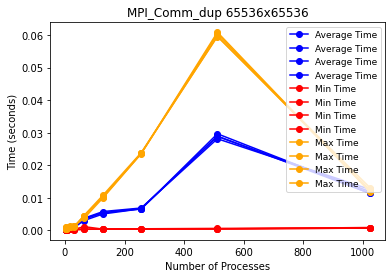

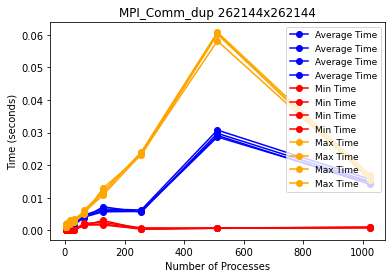

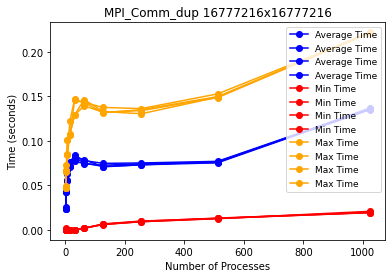

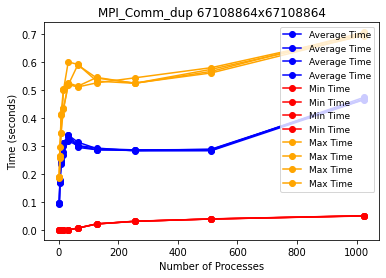

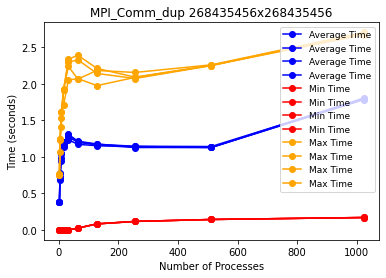

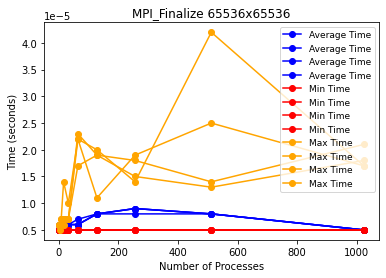

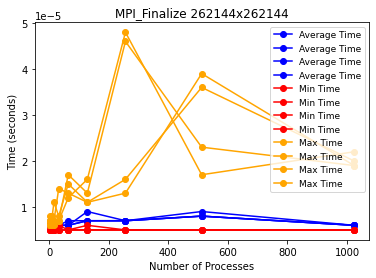

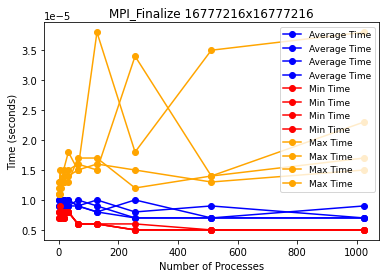

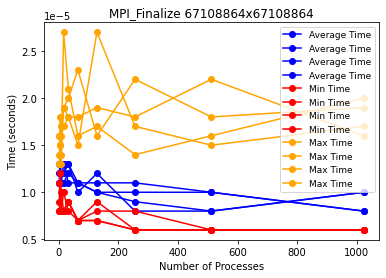

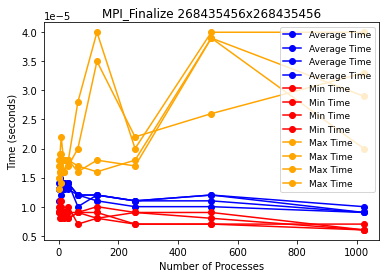

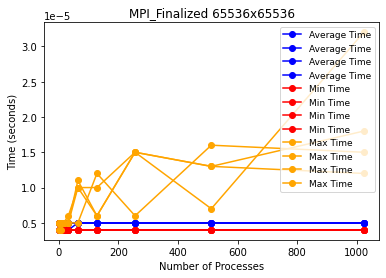

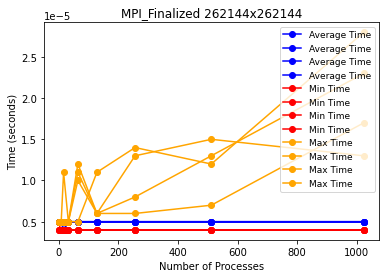

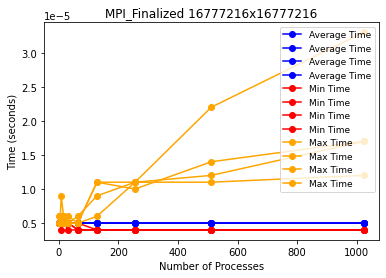

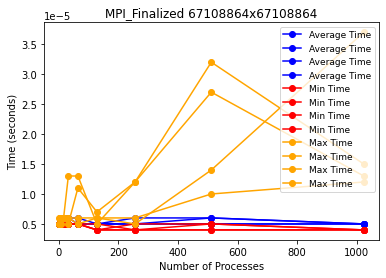

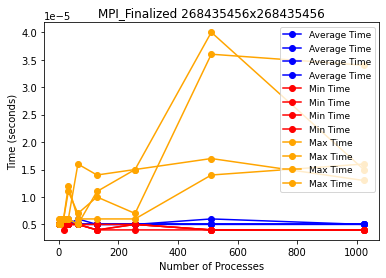

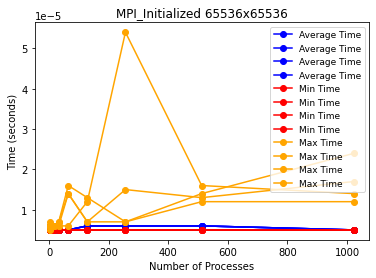

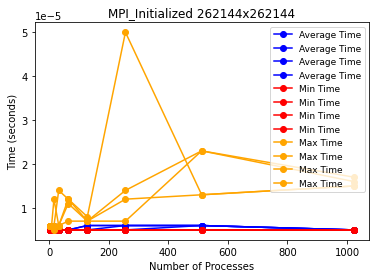

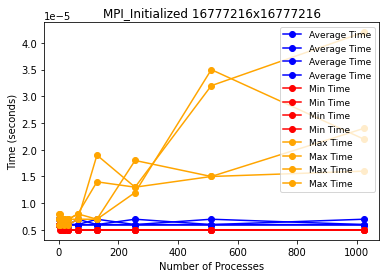

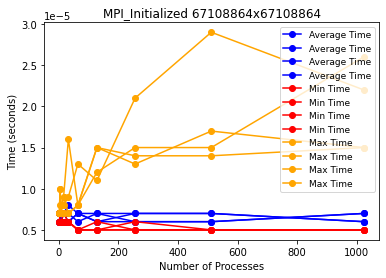

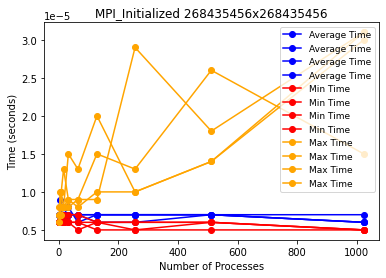

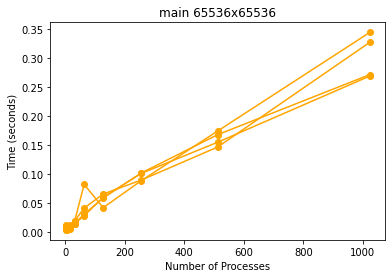

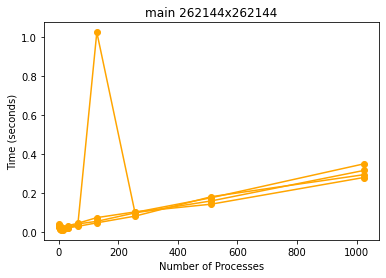

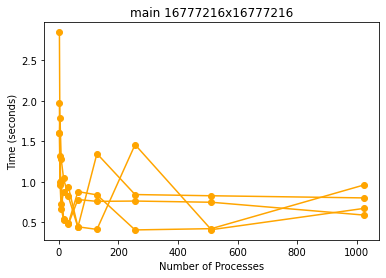

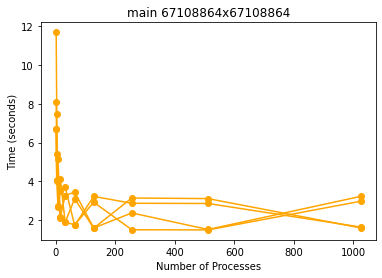

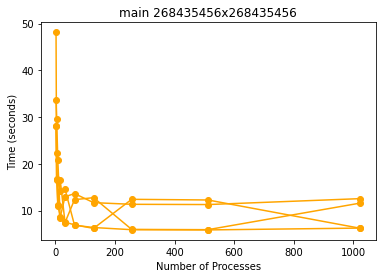

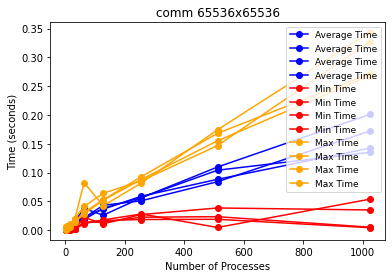

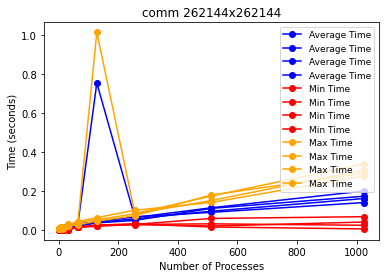

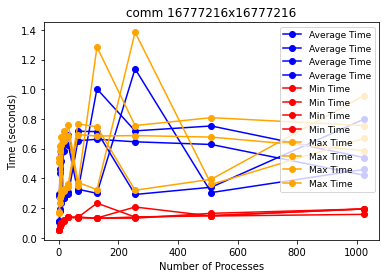

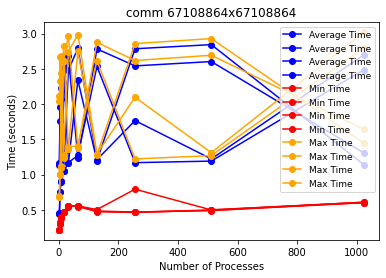

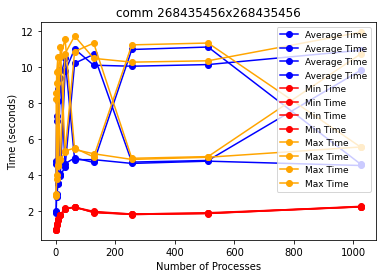

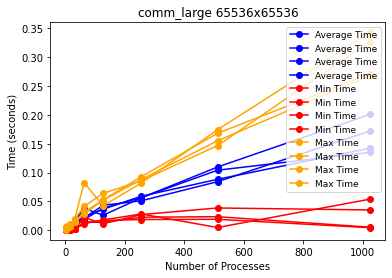

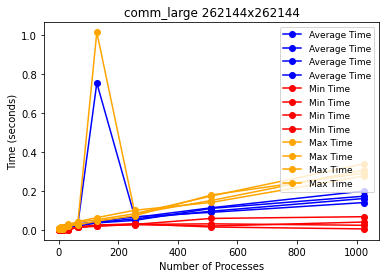

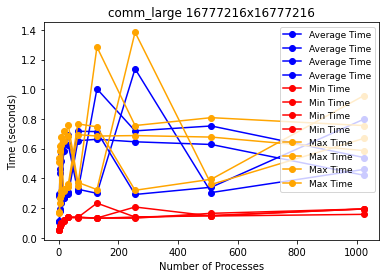

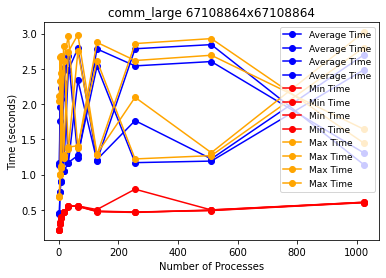

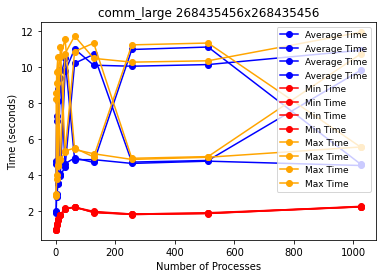

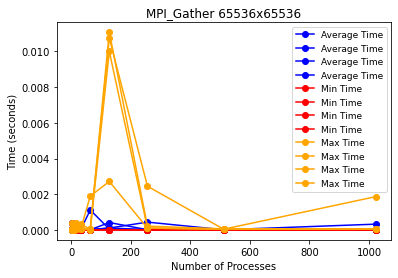

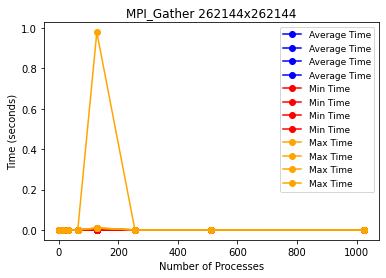

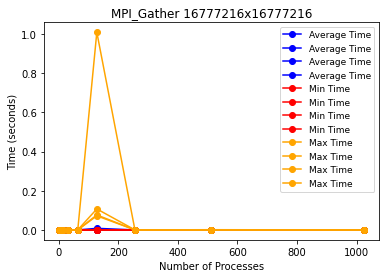

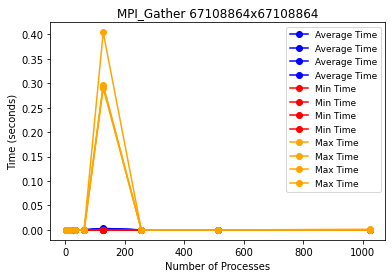

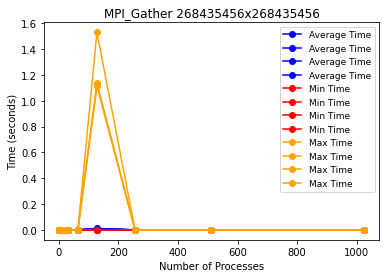

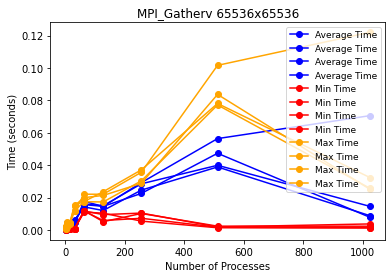

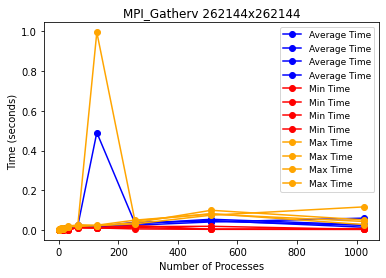

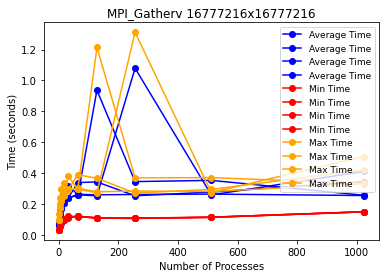

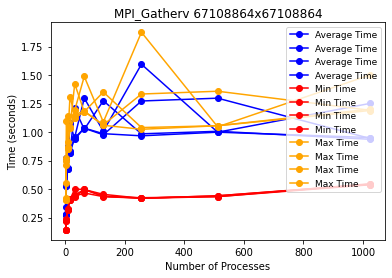

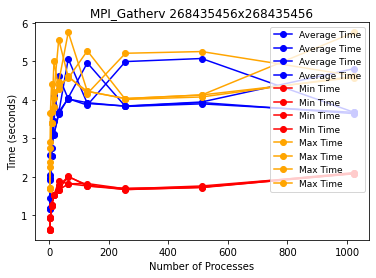

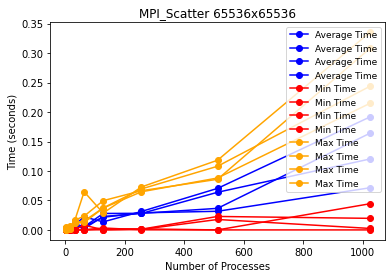

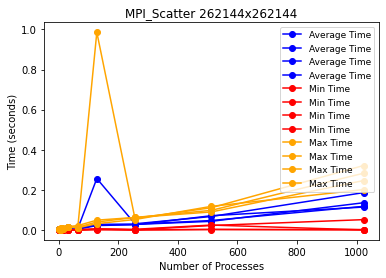

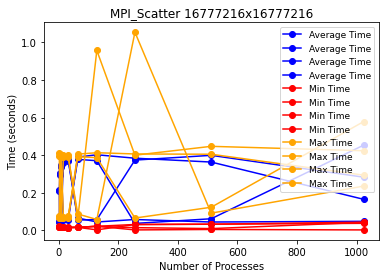

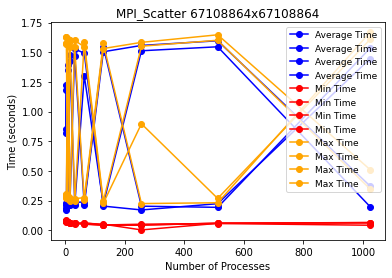

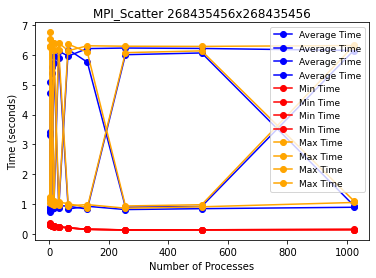

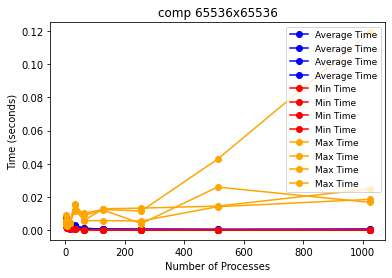

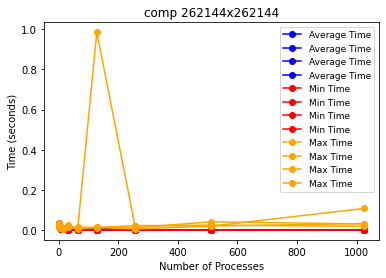

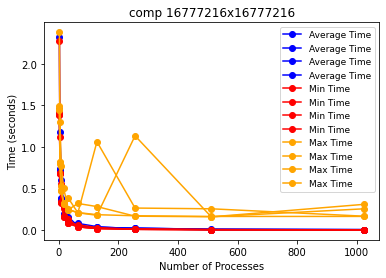

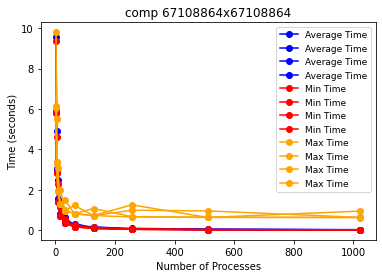

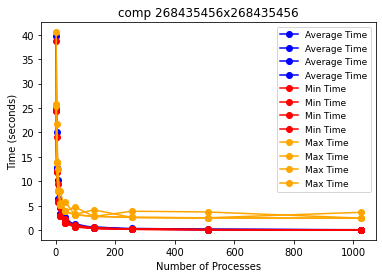

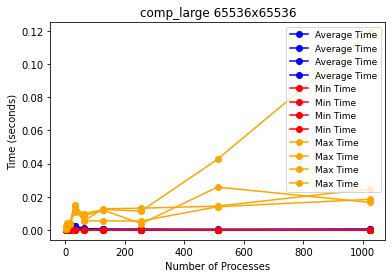

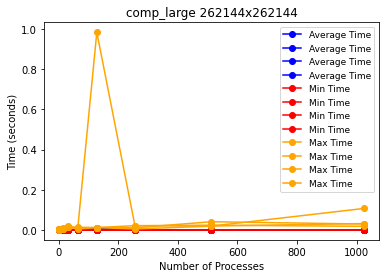

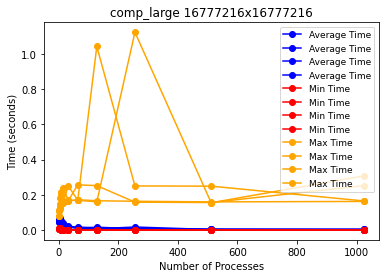

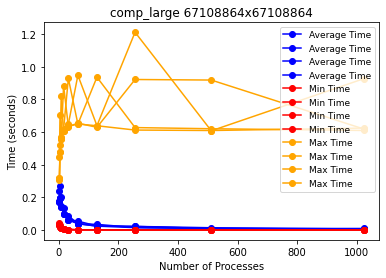

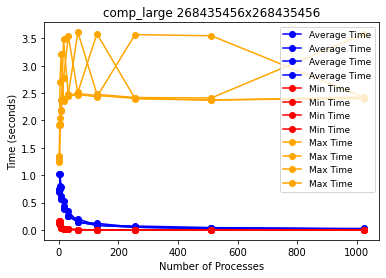

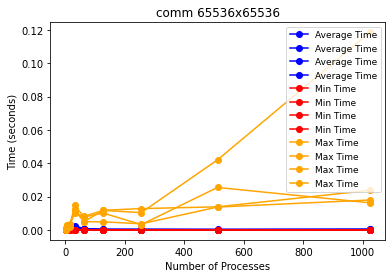

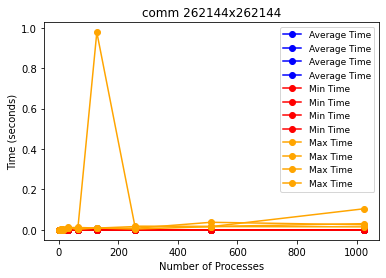

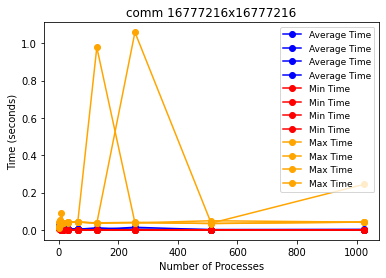

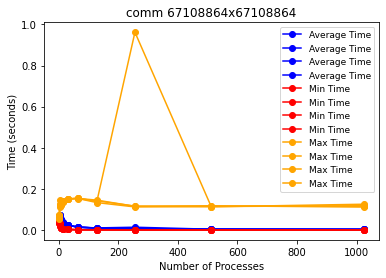

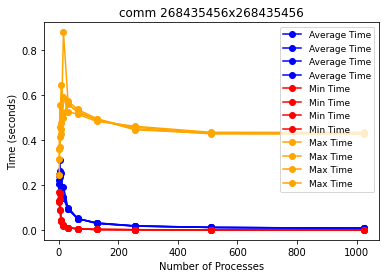

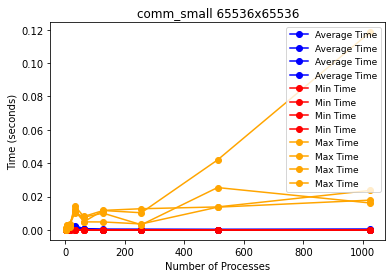

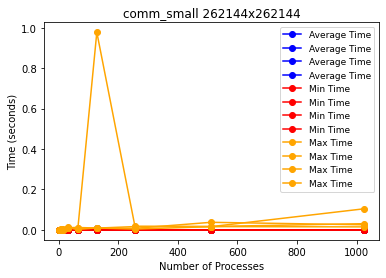

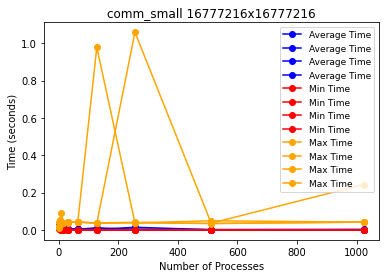

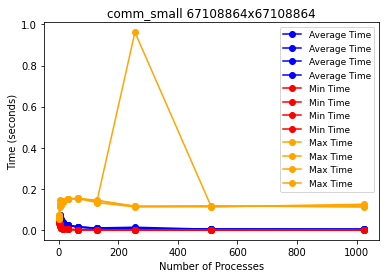

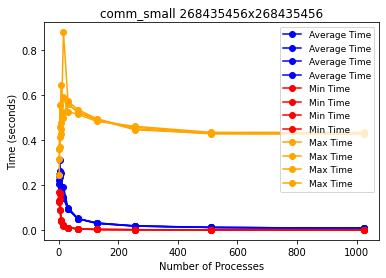

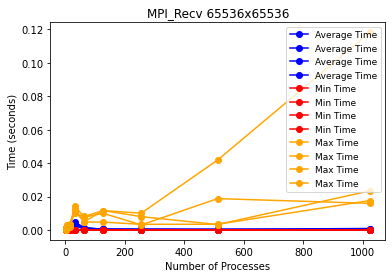

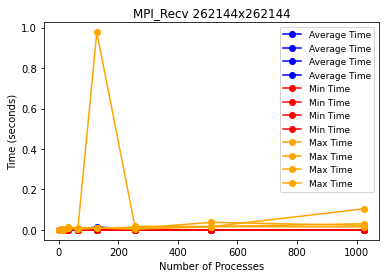

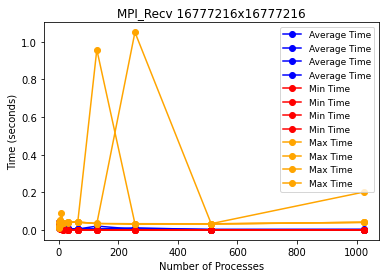

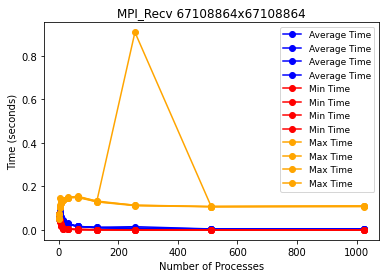

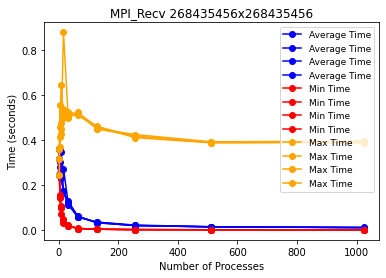

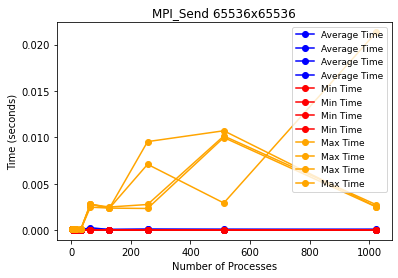

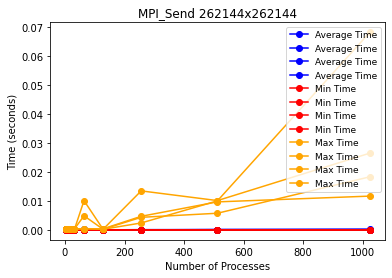

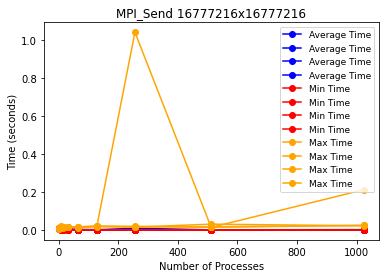

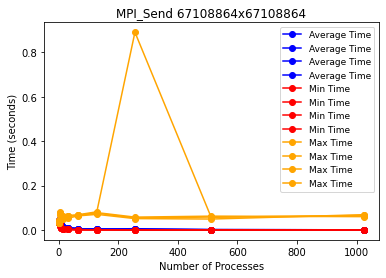

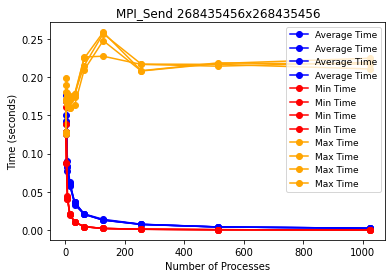

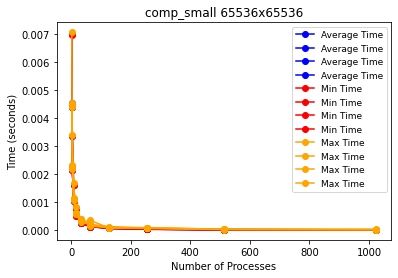

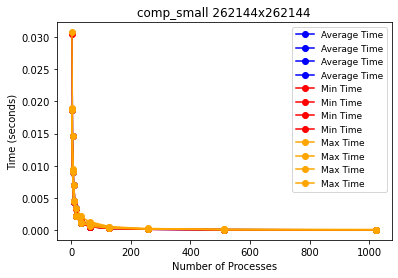

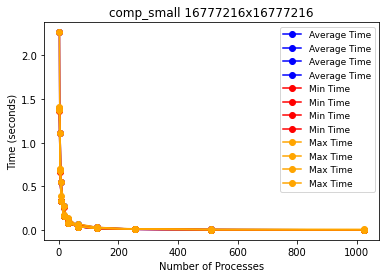

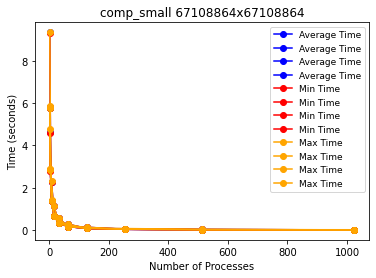

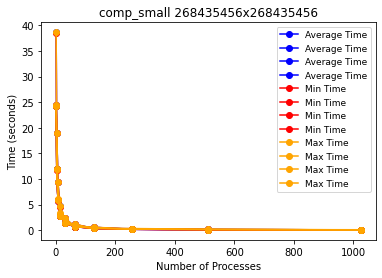

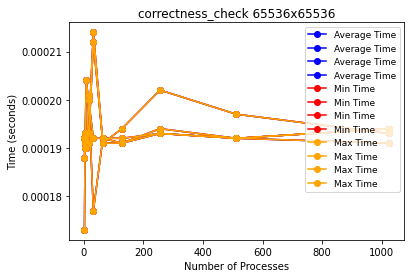

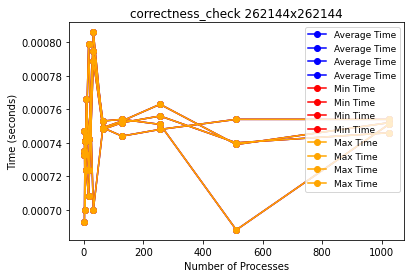

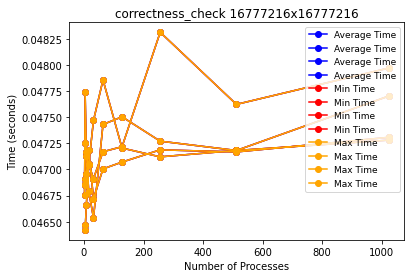

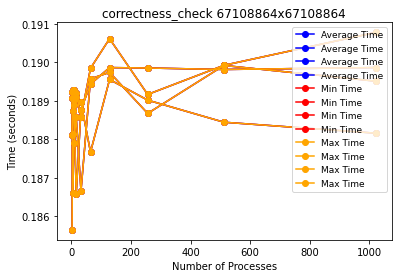

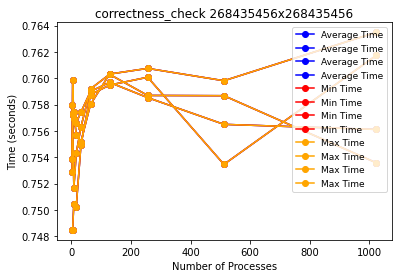

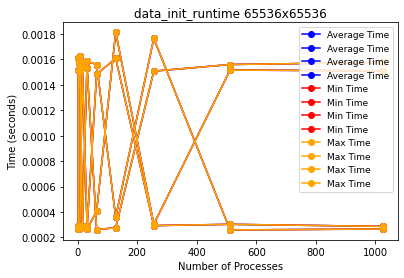

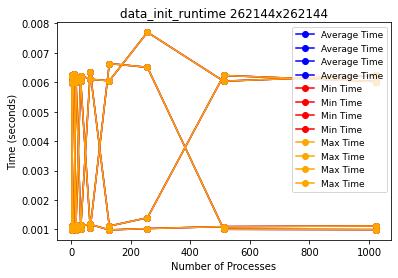

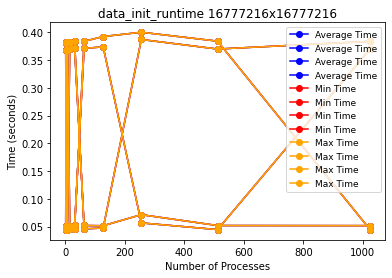

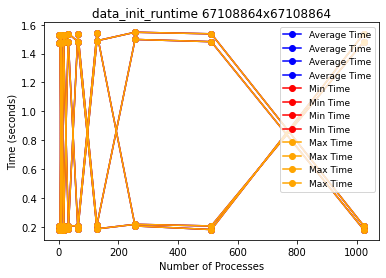

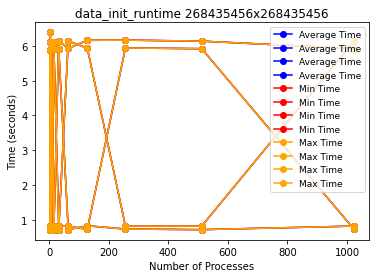

<Figure size 432x288 with 0 Axes>

In [11]:
for node in tk.graph.traverse():
    
    for m_size in input_sizes:
        
        if node.frame["name"] in ("main"):
            
            y_vals_max = []
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[2, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[4, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[8, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[16, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[32, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[64, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[128, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[256, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[512, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[1024, m_size])
            
            plt.plot([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], y_vals_max, marker='o', color='orange')
            plt.xlabel("Number of Processes")
            plt.ylabel('Time (seconds)')
            plt.title(f'{node.frame["name"]} {m_size}x{m_size}')
            plt.savefig(f'results/{m_size}_{node.frame["name"]}.png', bbox_inches = 'tight')
            plt.show()
            plt.clf()
        
        else:
            # Collecting average time values
            y_vals_avg = []
            y_vals_avg.append(tk.dataframe.loc[node, "Avg time/rank"].loc[2, m_size])
            y_vals_avg.append(tk.dataframe.loc[node, "Avg time/rank"].loc[4, m_size])
            y_vals_avg.append(tk.dataframe.loc[node, "Avg time/rank"].loc[8, m_size])
            y_vals_avg.append(tk.dataframe.loc[node, "Avg time/rank"].loc[16, m_size])
            y_vals_avg.append(tk.dataframe.loc[node, "Avg time/rank"].loc[32, m_size])
            y_vals_avg.append(tk.dataframe.loc[node, "Avg time/rank"].loc[64, m_size])
            y_vals_avg.append(tk.dataframe.loc[node, "Avg time/rank"].loc[128, m_size])
            y_vals_avg.append(tk.dataframe.loc[node, "Avg time/rank"].loc[256, m_size])
            y_vals_avg.append(tk.dataframe.loc[node, "Avg time/rank"].loc[512, m_size])
            y_vals_avg.append(tk.dataframe.loc[node, "Avg time/rank"].loc[1024, m_size])

            # Collecting minimum time values
            y_vals_min = []
            y_vals_min.append(tk.dataframe.loc[node, "Min time/rank"].loc[2, m_size])
            y_vals_min.append(tk.dataframe.loc[node, "Min time/rank"].loc[4, m_size])
            y_vals_min.append(tk.dataframe.loc[node, "Min time/rank"].loc[8, m_size])
            y_vals_min.append(tk.dataframe.loc[node, "Min time/rank"].loc[16, m_size])
            y_vals_min.append(tk.dataframe.loc[node, "Min time/rank"].loc[32, m_size])
            y_vals_min.append(tk.dataframe.loc[node, "Min time/rank"].loc[64, m_size])
            y_vals_min.append(tk.dataframe.loc[node, "Min time/rank"].loc[128, m_size])
            y_vals_min.append(tk.dataframe.loc[node, "Min time/rank"].loc[256, m_size])
            y_vals_min.append(tk.dataframe.loc[node, "Min time/rank"].loc[512, m_size])
            y_vals_min.append(tk.dataframe.loc[node, "Min time/rank"].loc[1024, m_size])

            # Collecting maximum time values
            y_vals_max = []
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[2, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[4, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[8, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[16, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[32, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[64, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[128, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[256, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[512, m_size])
            y_vals_max.append(tk.dataframe.loc[node, "Max time/rank"].loc[1024, m_size])

            plt.plot([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], y_vals_avg, marker='o', color='blue', label='Average Time')
            plt.plot([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], y_vals_min, marker='o', color='red', label='Min Time')
            plt.plot([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], y_vals_max, marker='o', color='orange', label='Max Time')

            plt.xlabel("Number of Processes")
            plt.ylabel('Time (seconds)')
            plt.legend(loc=1, prop={'size': 9})
            plt.title(f'{node.frame["name"]} {m_size}x{m_size}')
            plt.savefig(f'results/{m_size}_{node.frame["name"]}.png', bbox_inches = 'tight')
            plt.show()
            plt.clf()


In [12]:
!tar chvfz notebook.tar.gz results/

results/
results/16777216_correctness_check.png
results/1024_master_initialization.png
results/262144_MPI_Scatter.png
results/1048576_data_init_runtime.png
results/67108864_MPI_Finalized.png
results/1024_MPI_Scatter.png
results/262144_MPI_Gatherv.png
results/128_master_send_recieve.png
results/1048576_MPI_Finalize.png
results/67108864_comp_large.png
results/67108864_comm_large.png
results/262144_MPI_Initialized.png
results/1024_MPI_Finalize.png
results/262144_comp_small.png
results/262144_MPI_Gather.png
results/16777216_comp_small.png
results/16777216_MPI_Finalized.png
results/65536_MPI_Initialized.png
results/16777216_data_init_runtime.png
results/65536_data_init_runtime.png
results/268435456_data_init_runtime.png
results/262144_MPI_Send.png
results/1048576_comm_large.png
results/268435456_correctness_check.png
results/16777216_MPI_Initialized.png
results/268435456_comm_small.png
results/67108864_MPI_Gather.png
results/1024_MPI_Gather.png
results/67108864_data_init_runtime.png
results

In [58]:
!pwd

/scratch/user/christionbradley
